In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [43]:
from anbn import *
savefile = ["Anbn_train", "Anbn_test1", "Anbn_test2", "Anbn_test3", "Anbn_test4"]
obj = anbn


## generate train

In [53]:
file = "Anbnl032"
randneg = set()
negmaxlen = 32
negsams = 4000
negminlen = 0

while len(randneg) < negsams:
    tmp = anbn.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = anbn.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

In [54]:
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(8000, replace=True)

neg8000 = neg.sample(8000, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[0], header=None, index=None)

## generate test1

In [55]:
train = list(map(tuple, sample2w.values.tolist()))

In [56]:
file = "Anbnl032"
randneg = set()
negmaxlen = 32
negsams = 200
negminlen = 0
while len(randneg) < negsams:
    tmp = anbn.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = anbn.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

In [57]:
sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)

neg = neg.values.tolist()
nonoverlap_neg = list()
for n in neg:
    if (n[2], n[3]) not in train:
        nonoverlap_neg.append(n)
nonoverlap_neg = pd.DataFrame(nonoverlap_neg)
neg8000 = nonoverlap_neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[1], header=None, index=None)

## generate Test2

In [59]:
randneg = set()
negmaxlen = 64
negsams = 200
negminlen = 32
while len(randneg) < negsams:
    tmp = anbn.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = anbn.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

In [61]:
file = "Anbnl3264"
sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[2], header=None, index=None)

## generate Test3

In [62]:
negmaxlen = 128
negminlen = 64
file = "Anbnl64128"
nfile = 3
randneg = set()
negsams = 200
while len(randneg) < negsams:
    tmp = anbn.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = anbn.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg)

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

## generate Test4

In [63]:
negmaxlen = 256
negminlen = 128
file = "Anbnl128256"
nfile = 4
randneg = set()
negsams = 200
while len(randneg) < negsams:
    tmp = anbn.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = anbn.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg)

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

# Anbncn

In [80]:
from Anbncn import *
savefile = ["Anbncn_train", "Anbncn_test1", "Anbncn_test2", "Anbncn_test3", "Anbncn_test4"]
obj = anbncn


## generate train

file = "Anbncnl032"
randneg = set()
negmaxlen = 32
negsams = 4000
negminlen = 0

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = obj.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(8000, replace=True)

neg8000 = neg.sample(8000, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[0], header=None, index=None)

## generate test1

train = list(map(tuple, sample2w.values.tolist()))

file = "Anbncnl032"
nfile = 1
randneg = set()
negmaxlen = 32
negsams = 200
negminlen = 0
while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = obj.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)

neg = neg.values.tolist()
nonoverlap_neg = list()
for n in neg:
    if (n[2], n[3]) not in train:
        nonoverlap_neg.append(n)
nonoverlap_neg = pd.DataFrame(nonoverlap_neg)
neg8000 = nonoverlap_neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

## generate Test2

negmaxlen = 64
file = "Anbncnl3264"
nfile = 2
negminlen = 32
randneg = set()
negsams = 200

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = obj.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

## generate Test3

negmaxlen = 128
negminlen = 64
file = "Anbncnl64128"
nfile = 3
randneg = set()
negsams = 200
while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = obj.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg)

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

## generate Test4

negmaxlen = 256
negminlen = 128
file = "Anbncnl128256"
nfile = 4
randneg = set()
negsams = 200
while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label = obj.accept(tmp)
            tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
            serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
            if (tmp, serial) not in train:
                randneg.add((lentmp, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg)

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: str, 2: str, 3:str})

pos = data.loc[data[1] == "1" ]

neg = data.loc[data[1] == "0" ]

pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[2,3]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

# Dyck1

In [5]:
from Dyck1 import *
savefile = ["Dyck1_train", "Dyck1_test1", "Dyck1_test2", "Dyck1_test3", "Dyck1_test4"]
obj = d1




## generate train

In [18]:
## generate train

file = "Dyck1l08"
randneg = set()
negmaxlen = 32
negsams = 500
negminlen = 0
maxdepth = 8
mindepth = 0

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label, depth = obj.accept(tmp)
            if depth>=mindepth and depth <= maxdepth:
                tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
                serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
                randneg.add((lentmp, depth, label, tmp, serial))


randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: int, 2: str, 3: str, 4:str})

pos = data.loc[data[2] == "1" ]

neg = data.loc[data[2] == "0" ]

pos8000 = pos.sample(19000, replace=True)

neg8000 = neg.sample(500, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[3,4]]

#sample2w.to_csv(savefile[0], header=None, index=None)


In [48]:
# For balanced dataset

In [22]:
labels = sample2w.values.tolist()


labelps = list()
labelns = list()
for f, s in labels:
    if sum(map(int, s)) > 16:
        labelps.append([f, s])
    else:
        labelns.append([f, s])


pdf = pd.DataFrame(labelps)
ndf = pd.DataFrame(labelns)

In [44]:
sdf = pdf.sample(12000, replace=True).append(ndf.sample(8000, replace=True))
labels = sdf[1].values.tolist()
labell = [list(s) for s in labels]

<BarContainer object of 2 artists>

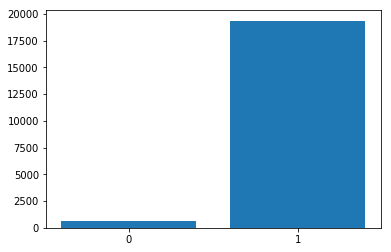

In [46]:
d = dict()
d['0'] = 0
d['1'] = 0
pncount = [s[-1] for s in labels]
for i in pncount:
    d[i] += 1
plt.bar(d.keys(), d.values())

<BarContainer object of 2 artists>

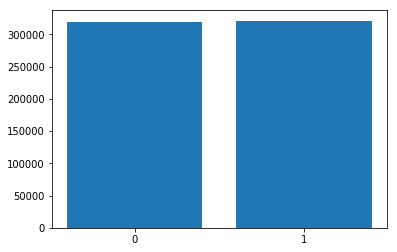

In [45]:

d = dict()
d['0'] = 0
d['1'] = 0
for s in labell:
    for c in s:
        d[c] += 1
plt.bar(d.keys(), d.values())

In [47]:
sdf.to_csv(savefile[0], header=None, index=None)

In [73]:

## generate test1

train = list(map(tuple, sample2w.values.tolist()))

file = "Dyck1l08"
nfile = 1
randneg = set()
negmaxlen = 32
negsams = 200
negminlen = 0
maxdepth = 8
mindepth = 0

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label, depth = obj.accept(tmp)
            if depth>=mindepth and depth <= maxdepth:
                tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
                serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
                if (tmp, serial) not in train:
                    randneg.add((lentmp, depth, label, tmp, serial))




randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: int, 2: str, 3: str, 4:str})

pos = data.loc[data[2] == "1" ]

neg = data.loc[data[2] == "0" ]


pos = pos.values.tolist()
nonoverlap_pos = list()
for n in pos:
    if (n[3], n[4]) not in train:
        nonoverlap_pos.append(n)
nonoverlap_pos = pd.DataFrame(nonoverlap_pos)
pos8000 = nonoverlap_pos.sample(sams, replace=True)

neg = neg.values.tolist()
nonoverlap_neg = list()
for n in neg:
    if (n[3], n[4]) not in train:
        nonoverlap_neg.append(n)
nonoverlap_neg = pd.DataFrame(nonoverlap_neg)
neg8000 = nonoverlap_neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[3,4]]

sample2w.to_csv(savefile[nfile], header=None, index=None)



In [75]:

## generate test2

#train = list(map(tuple, sample2w.values.tolist()))

file = "Dyck1l816"
nfile = 2
randneg = set()
negmaxlen = 256
negsams = 200
negminlen = 0
maxdepth = 16
mindepth = 8

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label, depth = obj.accept(tmp)
            if depth>mindepth and depth <= maxdepth:
                tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
                serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
                randneg.add((lentmp, depth, label, tmp, serial))




randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: int, 2: str, 3: str, 4:str})

pos = data.loc[data[2] == "1" ]

neg = data.loc[data[2] == "0" ]


pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[3,4]]

sample2w.to_csv(savefile[nfile], header=None, index=None)



In [3]:

## generate test3

file = "Dyck1l1632"
nfile = 3
randneg = set()
negmaxlen = 256
negsams = 200
negminlen = 0
maxdepth = 32
mindepth = 16

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label, depth = obj.accept(tmp)
            if depth>mindepth and depth <= maxdepth:
                tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
                serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
                randneg.add((lentmp, depth, label, tmp, serial))




randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: int, 2: str, 3: str, 4:str})

pos = data.loc[data[2] == "1" ]

neg = data.loc[data[2] == "0" ]


pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[3,4]]

sample2w.to_csv(savefile[nfile], header=None, index=None)



In [4]:

## generate test4

file = "Dyck1l32inf"
nfile = 4
randneg = set()
negmaxlen = 512
negsams = 200
negminlen = 0
maxdepth = 512
mindepth = 32

while len(randneg) < negsams:
    tmp = obj.negative(None, negmaxlen-2)
    if tmp:
        lentmp = len(tmp) + 2
        if lentmp > negminlen:
            serial, label, depth = obj.accept(tmp)
            if depth>mindepth and depth <= maxdepth:
                tmp = "s" + tmp + "e" + "#" * (negmaxlen-lentmp)
                serial = "0" + serial + serial[-1] * (negmaxlen-lentmp+1)
                randneg.add((lentmp, depth, label, tmp, serial))




randneg = list(map(list, randneg))

randneg = pd.DataFrame(randneg) 

sams = 400
data = pd.read_csv(file, header=None, index_col=None, dtype={0: int, 1: int, 2: str, 3: str, 4:str})

pos = data.loc[data[2] == "1" ]

neg = data.loc[data[2] == "0" ]


pos8000 = pos.sample(sams, replace=True)
neg8000 = neg.sample(sams, replace=True)

sample2w = pos8000.append(neg8000).append(randneg)[[3,4]]

sample2w.to_csv(savefile[nfile], header=None, index=None)

